<a href="https://colab.research.google.com/github/codewithharsha/DeepLearning/blob/main/PotatoDiseaseDetectionUsingCNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Potato Disease **Prediction**

In [ ]:
import os
os.environ["KAGGLE_CONFIG_DIR"] = "/"

In [ ]:
!kaggle datasets download -d arjuntejaswi/plant-village

 97% 319M/329M [00:02<00:00, 123MB/s]
100% 329M/329M [00:02<00:00, 139MB/s]


In [ ]:
!unzip plant-village.zip

In [27]:
# %rm -rf /content/PlantVillage/Pepper__bell___healthy
%rm -rf /content/PlantVillage/.ipynb_checkpoints

In [41]:
INPUT_SIZE = 256
BATCH_SIZE = 32
CHANNELS = 3
EPOCHS = 50
n_classes = 3

In [29]:
dataset = tf.keras.preprocessing.image_dataset_from_directory(
    "PlantVillage",
    shuffle = True,
    image_size = (INPUT_SIZE,INPUT_SIZE),
    batch_size = BATCH_SIZE
)

Found 2152 files belonging to 3 classes.


In [30]:
class_names = dataset.class_names

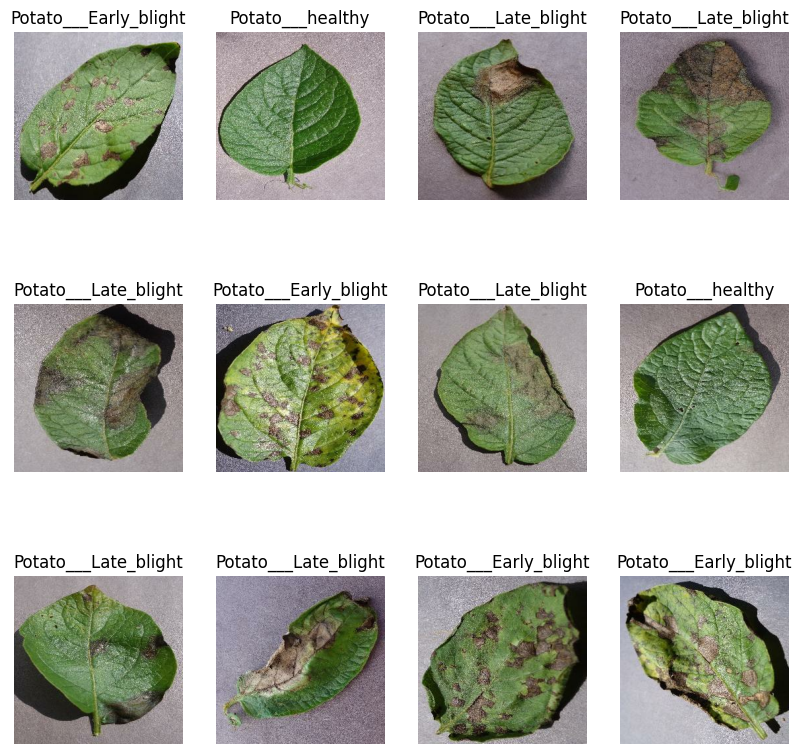

In [31]:
#visualitaion
plt.figure(figsize=(10,10))
for img_batch,label_batch in dataset.take(1):
  for i in range(12):
    ax = plt.subplot(3,4,i+1)
    title = class_names[label_batch[i]]
    plt.title(title)
    plt.imshow(img_batch[i].numpy().astype("uint8"))
    plt.axis("off")

In [32]:
#splitting data into training and testing sets
#trainning = 80%
#validation = 10%
#testing = 10%
def get_dataset_partions(ds,train_split=0.8,test_size=0.1,validation_size=0.1,shuffle=True,shuffle_size = 10000):
  le = len(ds)
  if shuffle:
    ds = ds.shuffle(shuffle_size,seed=True)
  train_size = int(le*train_split)
  train_set = ds.take(train_size)
  test_set = ds.skip(train_size)
  vaildation_size = int(le*test_size)
  validation_set = test_set.take(vaildation_size)
  test_set = test_set.skip(vaildation_size)
  return train_set,validation_set,test_set

In [33]:
train_set,validation_set,test_set = get_dataset_partions(dataset)

In [34]:
len(train_set)

54

In [35]:
len(test_set)

8

In [36]:
len(validation_set)

6

In [37]:
#optimizing dataset performance using cache and prefetch functions
train_set = train_set.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
validation_set = validation_set.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
test_set = test_set.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)

In [38]:
#Data PreProcessing

In [39]:
#Creating resize and scaling layers
resize_rescale = keras.Sequential([
    layers.experimental.preprocessing.Resizing(INPUT_SIZE,INPUT_SIZE),
    layers.experimental.preprocessing.Rescaling(1.0/255)
])

In [40]:
#creating layers to encounter rotated images
data_augementation = keras.Sequential([
    layers.experimental.preprocessing.RandomFlip("horizontal_and_vertical"),
    layers.experimental.preprocessing.RandomRotation(0.2)
])

In [45]:
input_shape = (BATCH_SIZE,INPUT_SIZE,INPUT_SIZE,CHANNELS)
model = models.Sequential([
    resize_rescale,
    data_augementation,
    layers.Conv2D(filters=32,kernel_size=(3,3),activation="relu",input_shape=input_shape),
    layers.MaxPooling2D((2,2)),

    layers.Conv2D(filters=64,kernel_size=(3,3),activation="relu"),
    layers.MaxPooling2D((2,2)),

    layers.Conv2D(filters=64,kernel_size=(3,3),activation="relu"),
    layers.MaxPooling2D((2,2)),

    layers.Conv2D(filters=64,kernel_size=(3,3),activation="relu"),
    layers.MaxPooling2D((2,2)),

    layers.Conv2D(filters=64,kernel_size=(3,3),activation="relu"),
    layers.MaxPooling2D((2,2)),

    layers.Flatten(),
    layers.Dense(64,activation="relu"),
    layers.Dense(n_classes,activation="softmax")
])
model.build(input_shape=input_shape)

In [46]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential (Sequential)     (32, 256, 256, 3)         0         
                                                                 
 sequential_1 (Sequential)   (32, 256, 256, 3)         0         
                                                                 
 conv2d_3 (Conv2D)           (32, 254, 254, 32)        896       
                                                                 
 max_pooling2d_3 (MaxPooling  (32, 127, 127, 32)       0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (32, 125, 125, 64)        18496     
                                                                 
 max_pooling2d_4 (MaxPooling  (32, 62, 62, 64)         0         
 2D)                                                  

In [47]:
model.compile(
    optimizer="adam",
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    metrics=["accuracy"]
)

In [48]:
history = model.fit(
    train_set,
    epochs=10,
    batch_size=BATCH_SIZE,
    verbose=1,
    validation_data = validation_set
)

Epoch 1/10
54/54 [==============================] - 287s 5s/step - loss: 0.8977 - accuracy: 0.4855 - val_loss: 0.8828 - val_accuracy: 0.5156
Epoch 2/10
54/54 [==============================] - 291s 5s/step - loss: 0.5178 - accuracy: 0.8003 - val_loss: 0.4289 - val_accuracy: 0.8281
Epoch 3/10
54/54 [==============================] - 292s 5s/step - loss: 0.3563 - accuracy: 0.8513 - val_loss: 0.3146 - val_accuracy: 0.8750
Epoch 4/10
54/54 [==============================] - 285s 5s/step - loss: 0.2216 - accuracy: 0.9091 - val_loss: 0.2911 - val_accuracy: 0.8802
Epoch 5/10
54/54 [==============================] - 279s 5s/step - loss: 0.2071 - accuracy: 0.9126 - val_loss: 0.2009 - val_accuracy: 0.9115
Epoch 6/10
54/54 [==============================] - 277s 5s/step - loss: 0.1778 - accuracy: 0.9329 - val_loss: 0.2818 - val_accuracy: 0.8646
Epoch 7/10
54/54 [==============================] - 263s 5s/step - loss: 0.1830 - accuracy: 0.9184 - val_loss: 0.2066 - val_accuracy: 0.9062
Epoch 8/10
54

In [49]:
score = model.evaluate(test_set)

8/8 [==============================] - 13s 1s/step - loss: 0.1594 - accuracy: 0.9336


In [50]:
score

[0.15942184627056122, 0.93359375]

In [51]:
history

In [52]:
history.params

{'verbose': 1, 'epochs': 10, 'steps': 54}

In [53]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [54]:
acc = history.history["accuracy"]
val_acc = history.history["val_accuracy"]
loss = history.history["loss"]
val_loss = history.history["val_loss"]

Text(0.5, 1.0, 'Training And Validation Loss')

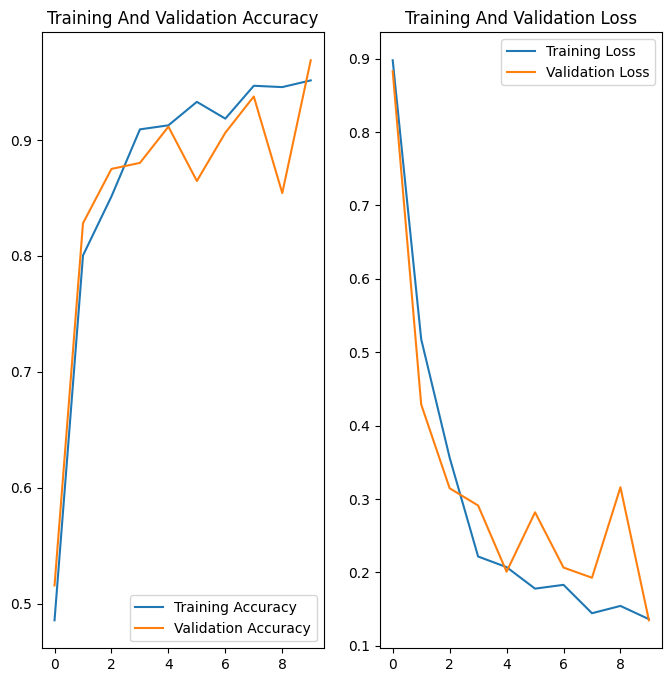

In [56]:
plt.figure(figsize=(8,8))
plt.subplot(1,2,1)
plt.plot(range(10),acc,label="Training Accuracy")
plt.plot(range(10),val_acc,label="Validation Accuracy")
plt.legend(loc="lower right")
plt.title("Training And Validation Accuracy")

plt.subplot(1,2,2)
plt.plot(range(10),loss,label="Training Loss")
plt.plot(range(10),val_loss,label="Validation Loss")
plt.legend(loc="upper right")
plt.title("Training And Validation Loss")

In [58]:
model.save("/content/drive/MyDrive/Colab Notebooks/Saved Models/potatodisease.h5")